<a href="https://colab.research.google.com/github/solobt777/Python_solobt777/blob/main/Week-4.2_ML_Clustering/AffinityPropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Affinity Propagation

#### Affinity Propagation is a clustering algorithm in unsupervised learning that automatically determines the number of clusters by finding "exemplars" (representative data points) among your dataset.

- Loads and prepares data - extracts Age, Income, and Spending Score
- Standardizes features - using StandardScaler for proper scaling
- Applies Affinity Propagation - automatically finds clusters
- Shows minimal output - just cluster count and centers
- Creates clean visualizations - 2D and 3D plots showing the clusters


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler

Clusters found: 4

Cluster Centers:
    Age  Income  Spending Score
0  24.0    39.0            65.0
1  53.0    46.0            46.0
2  42.0    86.0            20.0
3  30.0    88.0            86.0


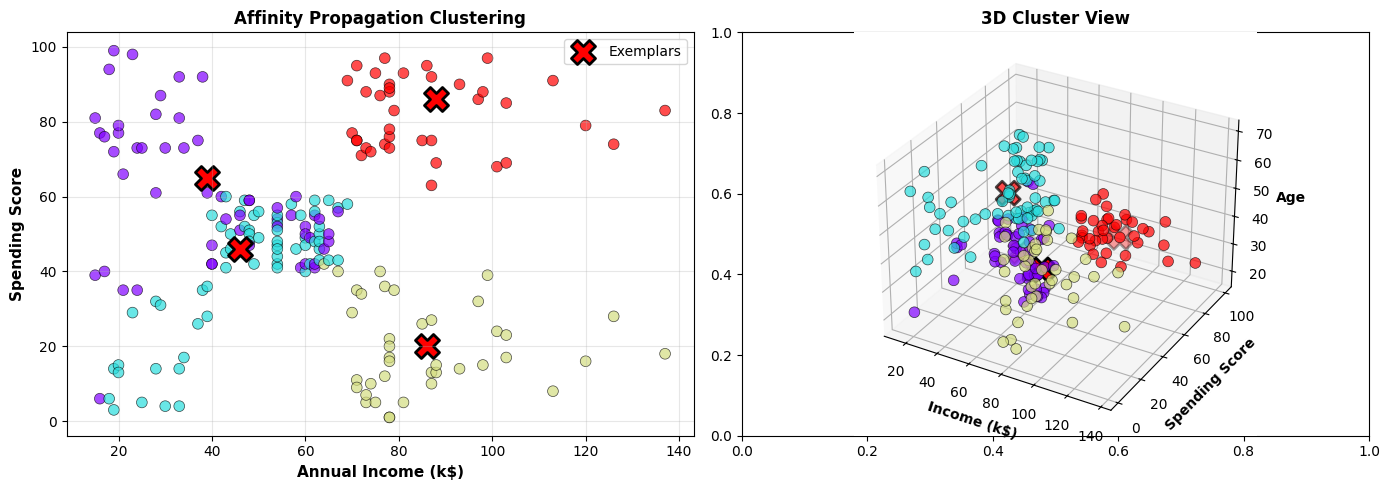

In [ ]:


df = pd.read_csv('Mall_Customers.csv')
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




# Apply Affinity Propagation
af = AffinityPropagation(damping=0.9, random_state=42, preference=-50)
labels = af.fit_predict(X_scaled)



# Get results
n_clusters = len(af.cluster_centers_indices_)
centers = scaler.inverse_transform(af.cluster_centers_)

print(f"Clusters found: {n_clusters}")
print(f"\nCluster Centers:\n{pd.DataFrame(centers, columns=['Age', 'Income', 'Spending Score']).round(1)}")




# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Income vs Spending Score
scatter = axes[0].scatter(X[:, 1], X[:, 2], c=labels, cmap='rainbow', s=60, alpha=0.7, edgecolors='black', linewidth=0.5)
axes[0].scatter(centers[:, 1], centers[:, 2], c='red', marker='X',
                s=300, edgecolors='black', linewidth=2, label='Exemplars')
axes[0].set_xlabel('Annual Income (k$)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Spending Score', fontsize=11, fontweight='bold')
axes[0].set_title('Affinity Propagation Clustering', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: 3D view
ax = fig.add_subplot(122, projection='3d')
scatter = ax.scatter(X[:, 1], X[:, 2], X[:, 0], c=labels, cmap='rainbow', s=60, alpha=0.7, edgecolors='black', linewidth=0.5)
ax.scatter(centers[:, 1], centers[:, 2], centers[:, 0], c='red', marker='X',
s=300, edgecolors='black', linewidth=2)
ax.set_xlabel('Income (k$)', fontweight='bold')
ax.set_ylabel('Spending Score', fontweight='bold')
ax.set_zlabel('Age', fontweight='bold')
ax.set_title('3D Cluster View', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## Silhouette Score

- Range: -1 to +1
- What it measures: How similar each point is to its own cluster compared to other clusters

## Interpretation:

+1: Perfect clustering (points very close to their cluster, far from others)
0: Overlapping clusters
-1: Points assigned to wrong clusters
- Best: Higher is better



## Calinski-Harabasz Score (Variance Ratio)

- Range: 0 to ∞
- What it measures: Ratio of between-cluster variance to within-cluster variance
- Interpretation: Higher score means clusters are dense and well-separated
- Best: Higher is better



## Davies-Bouldin Score

- Range: 0 to ∞
- What it measures: Average similarity between each cluster and its most similar cluster
- Interpretation: Lower score means clusters are farther apart and less scattered
- Best: Lower is better

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette Score
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.3f}")

# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_scaled, labels)
print(f"Calinski-Harabasz Index: {ch_score:.2f}")

# Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Index: {db_score:.3f}")

Silhouette Score: 0.402
Calinski-Harabasz Index: 124.41
Davies-Bouldin Index: 0.943
